In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import librosa

import IPython.display as ipd

# import utils

# import os
# import sys
# import configparser
# import glob

# import config

In [2]:
y, sr = librosa.load("D:/GA-DSI/capstone-data/fma_small/000/000002.mp3")

print(y.shape) # length? ns?
print(sr) # this is sample rate, can control this I believe

(660984,)
22050


In [3]:
len(y) / sr # ~30s

29.976598639455784

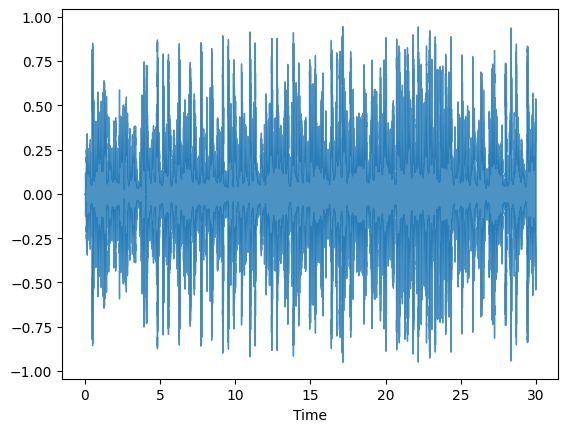

In [4]:
librosa.display.waveshow(y, sr = sr, alpha = 0.8);

In [5]:
ipd.Audio(y, rate = sr) # This is kinda cool for using in streamlit

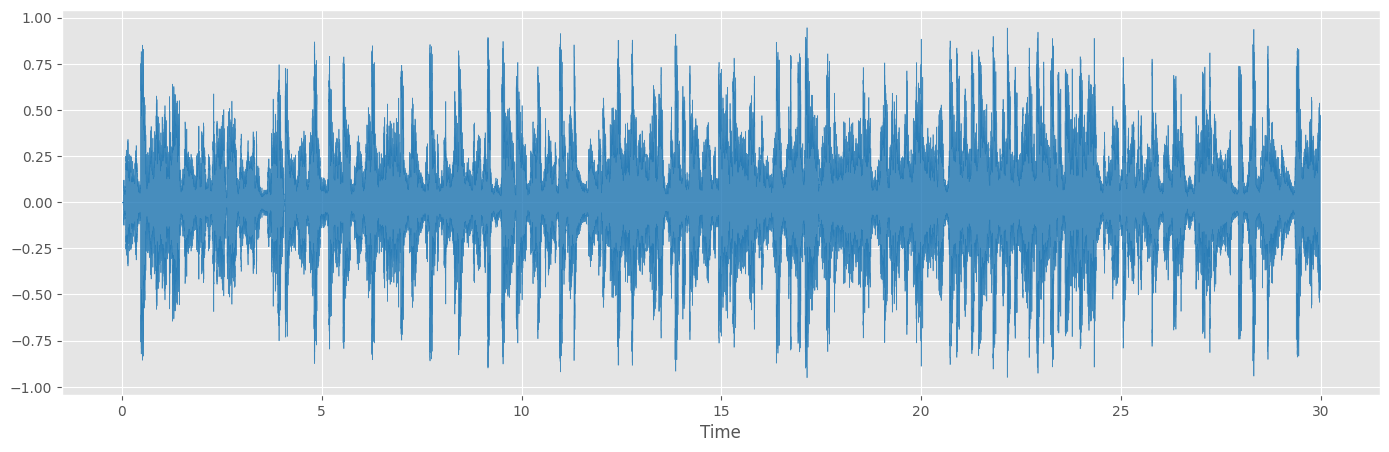

In [6]:
plt.style.use('ggplot')

plt.figure(figsize = (17, 5))
librosa.display.waveshow(y, sr = sr, alpha = 0.8, color = '#1f77b4');

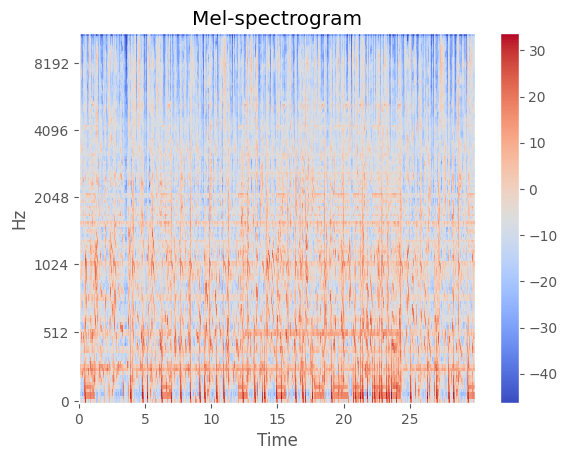

In [20]:
spectogram = librosa.feature.melspectrogram(y = y, sr = sr)
log_spectogram = librosa.power_to_db(spectogram)
librosa.display.specshow(log_spectogram, x_axis='time', y_axis='mel')
plt.colorbar()
plt.title("Mel-spectrogram");

In [8]:
echonest = pd.read_csv("D:/GA-DSI/capstone-data/fma_metadata/echonest.csv", index_col = 0, header = [0, 1, 2])['echonest']['audio_features']

In [9]:
echonest.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [10]:
echonest.shape # much more than just my dataset

(13129, 8)

In [11]:
echonest.describe()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,1.312900e+04,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000
mean,5.246876e-01,0.487290,0.537516,0.640536,0.187804,0.099174,123.080061,0.439761
std,3.837186e-01,0.190148,0.278049,0.361430,0.158051,0.137381,35.015137,0.276028
min,9.035000e-07,0.051307,0.000020,0.000000,0.025297,0.022324,12.753000,0.000010
25%,1.037726e-01,0.344759,0.321300,0.323466,0.101406,0.036932,95.967000,0.197321
50%,5.739848e-01,0.485635,0.549113,0.838134,0.119002,0.049019,120.057000,0.417743
75%,9.207270e-01,0.629094,0.776254,0.918244,0.211041,0.085452,145.318000,0.665575
max,9.957965e-01,0.968645,0.999964,0.998016,0.980330,0.966177,251.072000,0.999990


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN

In [13]:
pipe = Pipeline(
    [
        ('minmax', MinMaxScaler()),
        ('pca', PCA()), 
    ]
).fit(echonest)

In [14]:
pipe['pca']

PCA()

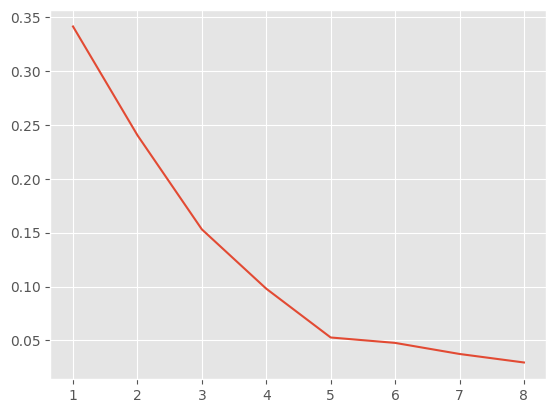

In [15]:
plt.plot(np.arange(pipe['pca'].n_components_) + 1, pipe['pca'].explained_variance_ratio_); # can take the first 5 it looks like

In [16]:
pipe = Pipeline(
    [
        ('minmax', StandardScaler()),
        #('pca', PCA(n_components = 5)),
        ('kmeans', KMeans(n_init = 30, random_state = 42)) 
    ]
).fit(echonest)

In [17]:
pipe['kmeans']

KMeans(n_init=30, random_state=42)

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
silhouette_score(pipe.transform(echonest), labels = pipe['kmeans'].labels_)

0.1888031091035124

In [21]:
PATH = "D:/GA-DSI/capstone-data/fma_small/000/"

In [22]:
import os

In [42]:
audio = []
sr = []

base_len = 660984
base_sr  = 22050


for file in os.listdir(PATH):
    file_path = PATH + file

    song, sr = librosa.load(file_path)
    if song.shape[0] != base_len:
        print('Oh no:', file_path)
    if base_sr != sr:
        print('SR:', file_path)

    mel = librosa.power_to_db(librosa.feature.melspectrogram(y = song, sr = sr))

    audio.append(mel)



Oh no: D:/GA-DSI/capstone-data/fma_small/000/000005.mp3
Oh no: D:/GA-DSI/capstone-data/fma_small/000/000182.mp3
Oh no: D:/GA-DSI/capstone-data/fma_small/000/000190.mp3
Oh no: D:/GA-DSI/capstone-data/fma_small/000/000194.mp3
Oh no: D:/GA-DSI/capstone-data/fma_small/000/000210.mp3
Oh no: D:/GA-DSI/capstone-data/fma_small/000/000459.mp3
Oh no: D:/GA-DSI/capstone-data/fma_small/000/000615.mp3
Oh no: D:/GA-DSI/capstone-data/fma_small/000/000625.mp3
Oh no: D:/GA-DSI/capstone-data/fma_small/000/000666.mp3
Oh no: D:/GA-DSI/capstone-data/fma_small/000/000706.mp3
Oh no: D:/GA-DSI/capstone-data/fma_small/000/000709.mp3
Oh no: D:/GA-DSI/capstone-data/fma_small/000/000718.mp3
Oh no: D:/GA-DSI/capstone-data/fma_small/000/000821.mp3
Oh no: D:/GA-DSI/capstone-data/fma_small/000/000853.mp3
Oh no: D:/GA-DSI/capstone-data/fma_small/000/000993.mp3
Oh no: D:/GA-DSI/capstone-data/fma_small/000/000995.mp3
Oh no: D:/GA-DSI/capstone-data/fma_small/000/000997.mp3


In [32]:
librosa.load(PATH + os.listdir(PATH)[4])[1]

22050

In [46]:
audio[3].shape

(128, 1291)

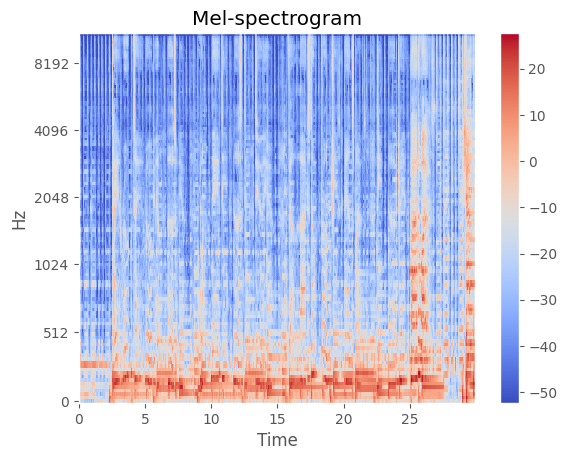

In [47]:
librosa.display.specshow(audio[3], x_axis='time', y_axis='mel')
plt.colorbar()
plt.title("Mel-spectrogram");

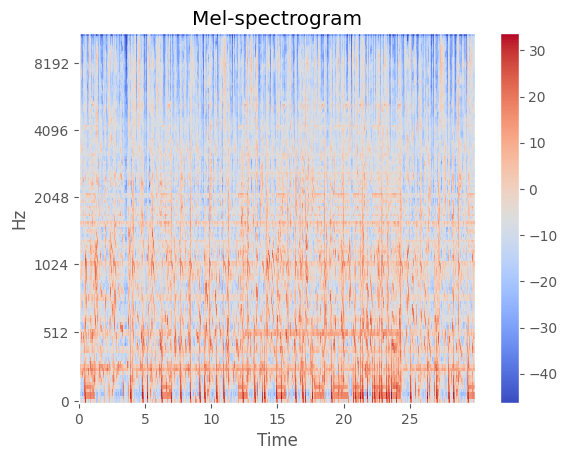

In [61]:
librosa.display.specshow(audio[0], x_axis='time', y_axis='mel')
plt.colorbar()
plt.title("Mel-spectrogram")
plt.xticks();

In [164]:
PATH = "D:/GA-DSI/capstone-data/fma_small/"

audio = []
rates = []
track_id = []

bad_files = [
    '098/098565.mp3',
    '098/098567.mp3',
    '098/098569.mp3',
    '099/099134.mp3',
    '108/108925.mp3',
    '133/133297.mp3'
]


for item in os.listdir(PATH):
    if 'check' not in item and '.txt' not in item:
        for file in os.listdir(PATH + item):
            if item + '/' + file in bad_files:
                continue
            track_id.append(item + '/' + file)
            file_path = PATH + track_id[-1]

            song, sr = librosa.load(file_path)

            mel = librosa.power_to_db(librosa.feature.melspectrogram(y = song, sr = sr)).T[:1291]

            audio.append(mel)
            rates.append(sr)

In [165]:
len(audio)

7994

In [166]:
df = pd.DataFrame([audio]).T

In [167]:
df['dim_1'] = df[0].apply(lambda x: x.shape[0])
df['dim_2'] = df[0].apply(lambda x: x.shape[1])

In [168]:
df['dim_2'].value_counts()

128    7994
Name: dim_2, dtype: int64

In [169]:
1291/30

43.03333333333333

In [170]:
660984/512

1290.984375

In [171]:
df['dim_1'].value_counts()

1291    7994
Name: dim_1, dtype: int64

In [172]:
1291*512 / sr

29.976961451247167

In [173]:
6600984 / (128 * (512/2) + 1)

201.43989746406666

In [174]:
sr / 512

43.06640625

In [176]:
song.shape[0] / 512

1290.984375

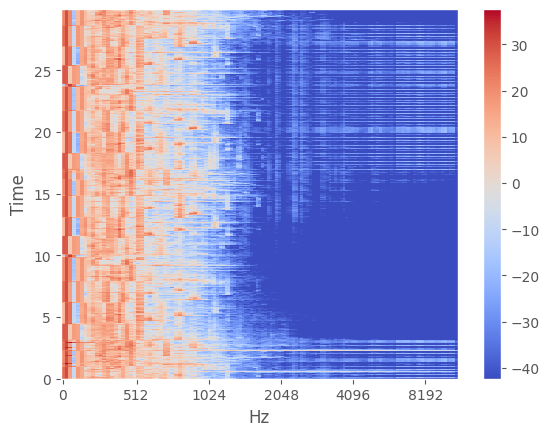

In [177]:
librosa.display.specshow(mel, x_axis = 'mel',  y_axis = 'time')
plt.colorbar();

In [154]:
mel.T.shape

(128, 1291)

In [155]:
audio[-1].T

array([[ 25.462027,  26.669924,  26.17214 , ...,  21.360645,  21.031616,
         21.198631],
       [ 26.45211 ,  30.231325,  30.581627, ...,  28.636414,  26.367409,
         28.939936],
       [ 15.882521,  16.590504,  16.505907, ...,  23.133606,  24.887554,
         22.769796],
       ...,
       [-42.36868 , -42.36868 , -42.36868 , ..., -42.36868 , -42.36868 ,
        -42.36868 ],
       [-42.36868 , -42.36868 , -42.36868 , ..., -42.36868 , -42.36868 ,
        -42.36868 ],
       [-42.36868 , -42.36868 , -42.36868 , ..., -42.36868 , -42.36868 ,
        -42.36868 ]], dtype=float32)

In [178]:
audio[0].shape

(1291, 128)

In [163]:
librosa.power_to_db(librosa.feature.melspectrogram(y = song, sr = sr)).T[:1290].shape

(1290, 128)

In [179]:
pd.DataFrame(audio[0]).describe()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,...,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000
mean,0.398654,3.231238,1.128855,0.119083,3.716183,2.031519,2.990328,4.011211,3.828331,9.999018,...,-14.189236,-15.226626,-15.780169,-15.950689,-16.543909,-17.043123,-18.231760,-18.569008,-20.971428,-31.576448
std,11.775755,15.704192,18.003321,14.364472,12.297500,10.978991,10.624911,9.817418,7.595122,5.311713,...,9.350387,9.341924,9.054299,9.060710,8.573128,8.447080,8.414304,8.424734,8.328606,7.970212
min,-33.642303,-34.974335,-37.508316,-26.913107,-22.045729,-21.474880,-20.585157,-23.459074,-14.903799,-18.429008,...,-46.266090,-45.824959,-45.171131,-46.266090,-45.179955,-46.266090,-46.266090,-46.266090,-46.266090,-46.266090
25%,-8.479081,-11.809509,-16.047514,-13.056928,-6.060047,-6.549980,-4.635166,-2.969702,-2.056145,7.213228,...,-20.941462,-22.354054,-22.638397,-22.664742,-22.631850,-23.381399,-23.759732,-24.602443,-26.878464,-37.457386
50%,-3.014533,-0.176835,-0.686490,-0.899041,1.614933,2.159136,3.303743,5.172001,3.595700,10.093264,...,-13.439870,-14.312119,-14.934455,-15.595432,-15.940391,-16.681973,-17.754944,-17.697479,-20.353329,-30.893194
75%,6.353399,16.425976,17.276983,13.419971,15.607577,9.562229,10.411690,11.614282,10.029062,13.552076,...,-7.301540,-8.346888,-9.124024,-8.871356,-10.767267,-10.850596,-12.744874,-13.004787,-15.056227,-25.834289
max,29.329987,33.733910,32.944939,30.293724,28.026722,26.978376,25.369303,21.949074,20.856121,23.670536,...,8.032077,6.615957,6.105006,7.204814,2.774448,3.719185,2.756614,2.138970,0.202772,-8.725329


In [180]:
pd.DataFrame(audio[1]).describe()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,...,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000
mean,4.764222,9.213841,11.575277,13.133286,11.449498,5.312912,3.253173,4.337332,5.276642,5.738895,...,-19.905758,-21.305759,-21.783154,-23.732740,-23.512375,-23.106461,-23.134417,-23.369057,-25.933350,-36.421936
std,11.304858,13.443874,9.230806,8.868998,8.796546,9.368754,8.434191,8.022733,7.227212,6.386831,...,7.572753,7.669822,7.902761,7.965715,7.777429,7.591177,7.713677,7.621688,7.592657,6.537728
min,-14.947511,-18.727699,-9.933911,-11.392818,-14.153032,-19.265177,-18.887497,-22.716488,-19.248564,-17.680544,...,-45.941750,-45.941750,-45.941750,-45.941750,-45.941750,-45.941750,-45.941750,-45.941750,-45.941750,-45.941750
25%,-3.475585,-1.732297,4.497319,5.857937,4.588618,-1.457688,-2.888601,-1.229542,0.626610,1.460849,...,-24.267886,-25.779035,-27.455340,-28.942445,-28.455218,-27.778639,-27.617195,-28.061291,-30.482329,-41.534323
50%,1.619013,6.624626,11.697675,12.863453,10.489436,4.020386,3.238889,5.118235,6.128692,5.872030,...,-18.292328,-19.996639,-20.027025,-23.149563,-23.076370,-22.738060,-22.724657,-23.166687,-25.549526,-36.583248
75%,10.211846,18.723259,18.023244,20.493500,19.038171,13.102067,9.327613,10.623824,10.669233,10.301096,...,-14.595112,-15.958222,-16.009086,-17.981556,-17.876535,-17.653349,-17.742371,-18.135171,-20.682098,-31.720995
max,29.837646,34.058250,31.064035,31.939697,29.497004,28.303812,21.463142,18.856754,21.868660,23.290909,...,-4.248503,-5.109997,-6.547902,-4.888435,-6.364194,-3.607471,-1.976997,-4.303833,-6.529104,-18.404060
